<a href="https://colab.research.google.com/github/Yosafat1997/Ruangguru-Airline-Recommender/blob/main/AirlineRecomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!pip install -U surprise

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
import pandas as pd
import surprise as sp

DATASET SETUP From Here https://www.kaggle.com/datasets/efehandanisman/skytrax-airline-reviews

In [96]:
data = pd.read_csv(r'/content/drive/MyDrive/Preject_ML/capstone_airline_reviews3.csv',skip_blank_lines=True).dropna()

In [97]:
data.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

Removing Most Null Columns

In [98]:
used_ds  = data[['airline','author','aircraft', 'traveller_type', 'cabin',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']]

In [99]:
import numpy as np
missing_val = (used_ds.isnull().sum())
total = used_ds.shape[0]
pct_missing = (missing_val/total) * 100
pct_miss = pct_missing.reset_index()
filler = {}
dropped = []
used_ds_cleaned = pd.DataFrame()
for c in pct_miss.values:
  col = c[0]
  miss = c[1]
  if c[1]<30 and c[1]!=0:
    if used_ds[col].dtypes=='object':
      # val = data[col].mode()
      used_ds_cleaned[col]=used_ds[col].str.replace('nan', 'U')
    else:
      val = used_ds[col].median(numeric_only=True)
      used_ds_cleaned[col]=used_ds[col].replace(np.nan,val)
  elif c[1]>=30:
    continue
  else:
    used_ds_cleaned[col] = data[col]

In [100]:
used_ds_cleaned

,airline,author,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
7,Turkish Airlines,Zeshan Shah,A330,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0
15,Turkish Airlines,S Gonser,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,3.0,3.0,2.0,3.0,1.0,2.0
17,Turkish Airlines,Sami Osman,A320 / Boeing 737,Solo Leisure,Economy Class,2.0,3.0,3.0,3.0,3.0,3.0
19,Turkish Airlines,Norka Idalia Orlando,A320 / A330,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0
29,Turkish Airlines,Trevor Khurana,Boeing 777-300,Solo Leisure,Economy Class,1.0,3.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
131676,Ukraine International,A Dunduras,Boeing 767,Solo Leisure,Economy Class,2.0,4.0,2.0,1.0,4.0,5.0
131680,Ukraine International,Filip Badziak,Boeing 767,Couple Leisure,Economy Class,2.0,2.0,2.0,1.0,2.0,5.0
131696,Ukraine International,Nataliya Vasylkevych,Boeing,Family Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0
131702,Ukraine International,Oleksii Maksimov,Boeing 737,Couple Leisure,Economy Class,5.0,5.0,5.0,4.0,4.0,4.0


<Axes: >

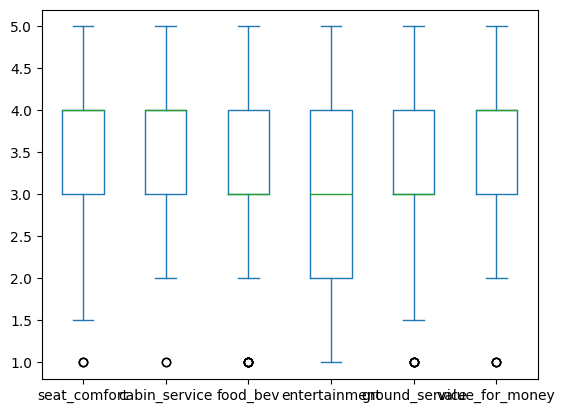

In [115]:
used_ds_cleaned.groupby('airline')[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']].median().plot(kind='box')

<Axes: >

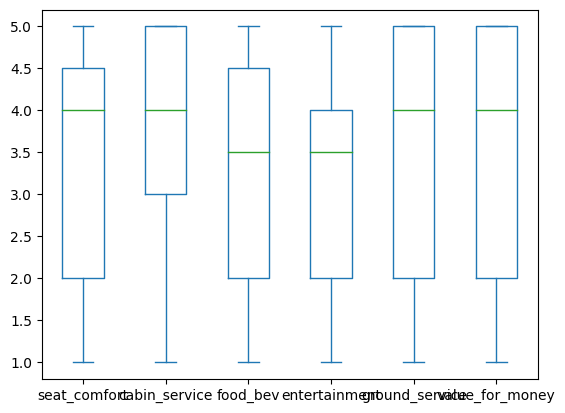

In [116]:
used_ds_cleaned.groupby('author')[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']].median().plot(kind='box')

In [101]:
used_ds_cleaned['recommendation_score'] = used_ds_cleaned[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money']].mean(axis=1).round(2)
used_ds_fin = used_ds_cleaned[['author','airline','recommendation_score']]

In [102]:
used_ds_fin

,author,airline,recommendation_score
7,Zeshan Shah,Turkish Airlines,4.83
15,S Gonser,Turkish Airlines,2.33
17,Sami Osman,Turkish Airlines,2.83
19,Norka Idalia Orlando,Turkish Airlines,1.00
29,Trevor Khurana,Turkish Airlines,1.67
...,...,...,...
131676,A Dunduras,Ukraine International,3.00
131680,Filip Badziak,Ukraine International,2.33
131696,Nataliya Vasylkevych,Ukraine International,1.00
131702,Oleksii Maksimov,Ukraine International,4.50


In [103]:
air_map = pd.DataFrame.from_dict({'airline':used_ds_fin['airline'].unique()}).reset_index()
air_map['id'] = air_map['index']
air_map = air_map.drop(columns=['index'])

In [113]:
fin = pd.merge(used_ds_fin, air_map, on='airline')

In [105]:
fin = fin.drop(columns = ['airline'])
fin['user'] = fin['author'].astype('category').cat.codes
finest = fin[['user','id','recommendation_score']]

In [106]:
finest

,user,id,recommendation_score
0,9404,0,4.83
1,7696,0,2.33
2,8081,0,2.83
3,6320,0,1.00
4,8801,0,1.67
...,...,...,...
14207,72,80,3.00
14208,2698,80,2.33
14209,6219,80,1.00
14210,6385,80,4.50


<Axes: >

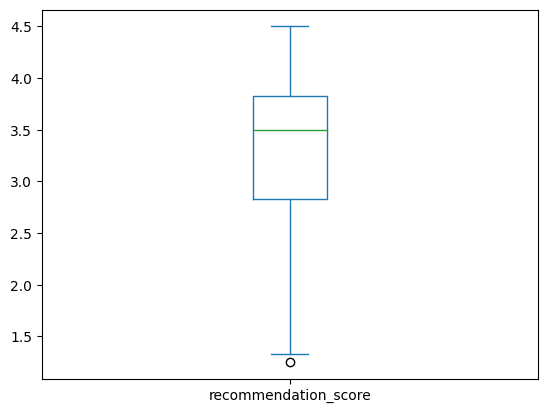

In [114]:
finest.groupby('id')['recommendation_score'].median().plot(kind='box')

Building Recomendation System

In [108]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [109]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(finest, reader)

In [110]:
results = cross_validate(KNNWithMeans(k=3, min_k=1, sim_options=knn_options), data, measures=['RMSE'], cv=10, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [111]:
result = pd.DataFrame.from_dict({'fold':[i+1 for i in range (10)],'result':results['test_rmse']})

In [112]:
result

,fold,result
0,1,1.107547
1,2,1.116789
2,3,1.123352
3,4,1.086422
4,5,1.106466
5,6,1.096504
6,7,1.094321
7,8,1.071460
8,9,1.101790
9,10,1.095116


from matplotlib import pyplot as plt
result['fold'].plot(kind='hist', bins=20, title='fold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result['result'].plot(kind='hist', bins=20, title='result')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result.plot(kind='scatter', x='fold', y='result', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fold']
  ys = series['result']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = result.sort_values('fold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fold')
_ = plt.ylabel('result')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['fold']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'fold'}, axis=1)
              .sort_values('fold', ascending=True))
  xs = counted['fold']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = result.sort_values('fold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fold')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
result['fold'].plot(kind='line', figsize=(8, 4), title='fold')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result['result'].plot(kind='line', figsize=(8, 4), title='result')
plt.gca().spines[['top', 'right']].set_visible(False)

In [117]:
result.median()

fold      5.500000
result    1.099147
dtype: float64